## Logistics Regression

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [114]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import SelectFromModel

In [115]:
pd.pandas.set_option('max_columns',None)

In [116]:
data = pd.read_csv('Churn_Modelling.csv')

In [117]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [119]:
data.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [120]:
data.shape

(10000, 12)

In [121]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
len(data['Surname'].value_counts())

2932

In [123]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [124]:
data[data['Geography']=='France']['Exited'].mean()

0.16154766653370561

In [125]:
data[data['Geography']=='Germany']['Exited'].mean()

0.32443204463929853

In [126]:
data[data['Geography']=='Spain']['Exited'].mean()

0.1667339523617279

In [127]:
d = {'France':0,'Germany':2,'Spain':1}

In [128]:
data['Geography']=data['Geography'].map(d)

In [129]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [130]:
l = {'Male':0,'Female':1}
data['Gender']=data['Gender'].map(l)

In [131]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [132]:
x = data.drop(columns=['Surname','Exited'])
y = data['Exited']

In [133]:
x.shape,y.shape

((10000, 10), (10000,))

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42,stratify=y)

In [135]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [136]:
X_train = pd.DataFrame(x_train_scalled,columns=x_train.columns)
X_test  = pd.DataFrame(x_test_scalled,columns=x_test.columns)

### Imbalace to Balance

In [137]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

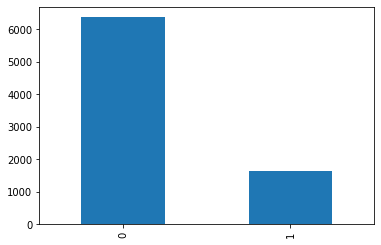

In [138]:
y_train.value_counts().plot(kind='bar')
plt.show()

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
sm=SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [141]:
x_train_res,y_train_res = sm.fit_sample(X_train,y_train)

In [142]:
y_train_res.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

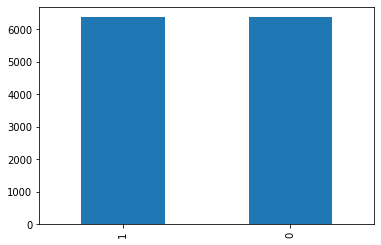

In [143]:
y_train_res.value_counts().plot(kind='bar')
plt.show()

## L1 Regularization

In [152]:
sel = SelectFromModel(LogisticRegression(penalty='l1',C=0.01,solver='liblinear',random_state=42))

In [153]:
sel.fit(x_train_res,y_train_res)

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=42,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [154]:
sel.get_support()

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True])

In [155]:
featuers = x_train.columns[sel.get_support()]
featuers

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [156]:
x_train_sel = sel.transform(x_train_res)
x_test_sel  = sel.transform(X_test)

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfe = RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42)
rfe.fit(x_train_sel,y_train_res)
y_pred=rfe.predict(x_test_sel)
print('Model Accuarcy :-',accuracy_score(y_test,y_pred))

Model Accuarcy :- 0.83


## L2 Regularization.

In [166]:
sel = SelectFromModel(LogisticRegression(penalty='l2',C=0.01,random_state=42,solver='lbfgs'))
sel.fit(x_train_res,y_train_res)

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=42, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [167]:
sel.get_support()

array([False,  True,  True,  True, False, False, False, False,  True,
       False])

In [168]:
sel.estimator_.coef_

array([[-0.07168098,  0.32022854,  0.2495315 ,  0.82280977, -0.00476912,
         0.19536142, -0.11111646, -0.02071637, -0.42649155,  0.05721105]])

In [169]:
np.mean(sel.estimator_.coef_)

0.10103677992426581

- Which coeficient of the logistic regression greater than the mean of the logistic regression coeficient we had taken as important feature over here.

In [170]:
feature = x_train.columns[sel.get_support()]
feature

Index(['Geography', 'Gender', 'Age', 'IsActiveMember'], dtype='object')

In [171]:
X_train_sel = sel.transform(x_train_res)
X_test_sel  = sel.transform(X_test)

In [172]:
rfe = RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42)
rfe.fit(x_train_res,y_train_res)
y_pred=rfe.predict(X_test)
print('Model Accuarcy :-',accuracy_score(y_test,y_pred))

Model Accuarcy :- 0.8435


## Linear Regression.

In [173]:
data= pd.read_csv('kc_house_data.csv')

In [174]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [175]:
data.drop(columns=['id','date'],inplace=True)

In [176]:
data.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


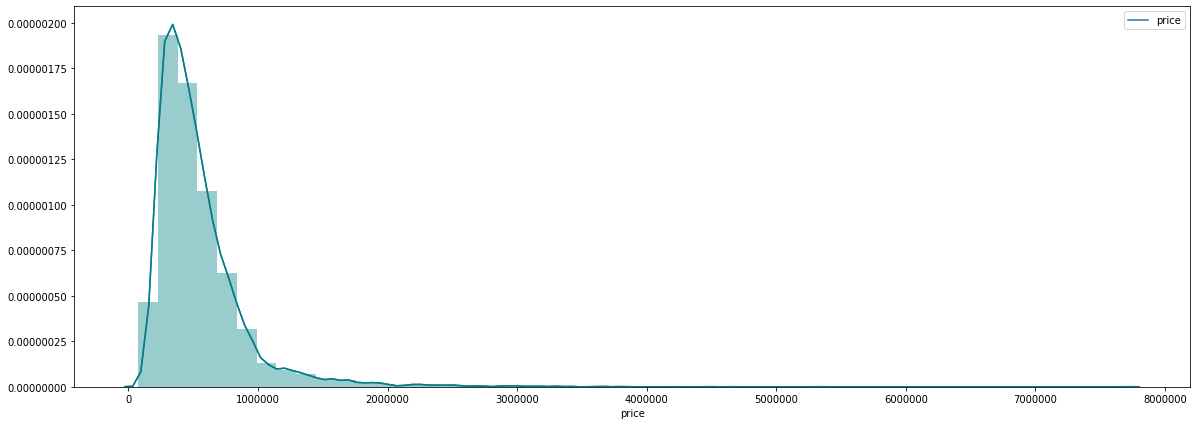

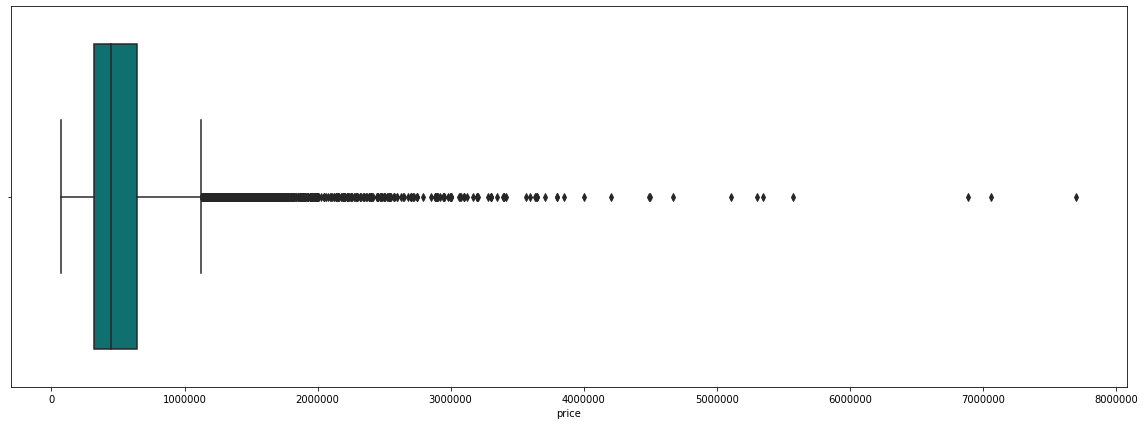

In [179]:
plt.figure(figsize=(20,7))
ax = sns.kdeplot(data['price'])
sns.distplot(data['price'],ax=ax,color='teal')
plt.show()
plt.figure(figsize=(20,7))
sns.boxplot(data['price'],color='teal')
plt.show()

## REmove the outliers.

In [181]:
Q1=data['price'].quantile(0.25)
Q3=data['price'].quantile(0.75)

IQR=Q3-Q1
IQR

323050.0

In [182]:
dataiqr = data[~((data['price']<Q1-1.5*IQR)|(data['price']>Q3+1.5*IQR))]

In [185]:
data.shape

(21613, 19)

In [183]:
dataiqr.shape

(20467, 19)

In [188]:
removed_total_outliers=data.shape[0]-dataiqr.shape[0]
removed_total_outliers

1146

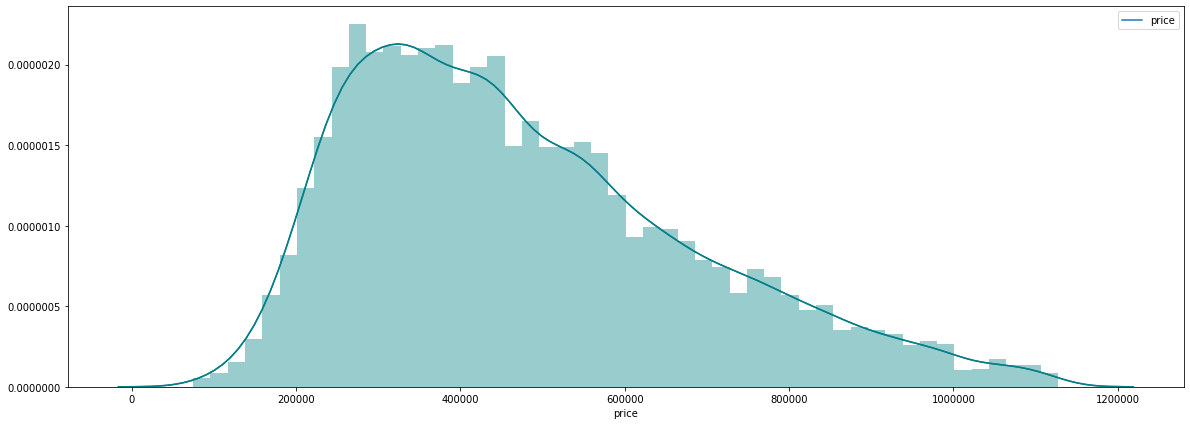

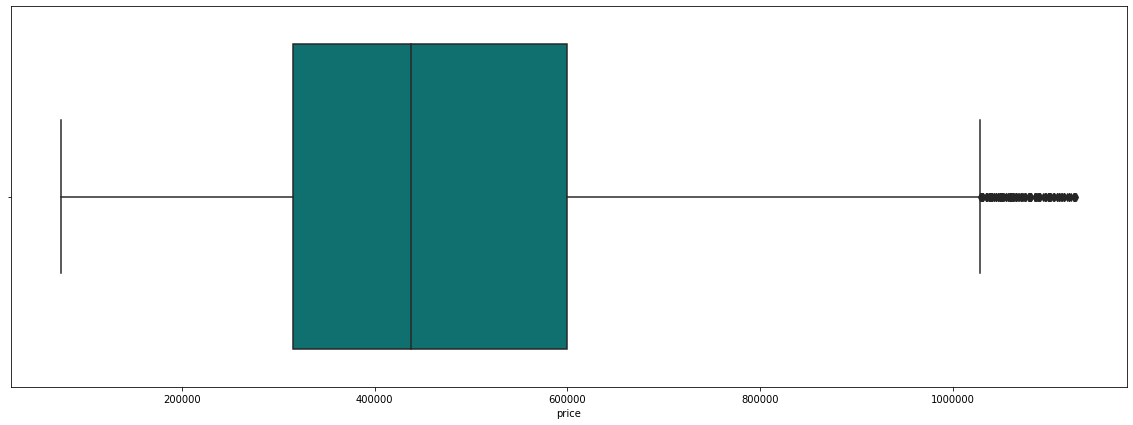

In [184]:
plt.figure(figsize=(20,7))
ax = sns.kdeplot(dataiqr['price'])
sns.distplot(dataiqr['price'],ax=ax,color='teal')
plt.show()
plt.figure(figsize=(20,7))
sns.boxplot(dataiqr['price'],color='teal')
plt.show()

In [192]:
x = dataiqr.drop(columns=['yr_built','yr_renovated','zipcode','price'])
y = dataiqr['price']

In [193]:
x.shape,y.shape

((20467, 15), (20467,))

In [194]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [195]:
x_train.shape,x_test.shape

((16373, 15), (4094, 15))

In [196]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [197]:
X_train = pd.DataFrame(x_train_scalled,columns=x_train.columns)
X_test  = pd.DataFrame(x_test_scalled,columns=x_test.columns)

In [202]:
sel = SelectFromModel(LinearRegression(),threshold='median')

In [203]:
sel.fit(X_train,y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='median')

In [204]:
sel.get_support()

array([False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False])

In [205]:
features = x_train.columns[sel.get_support()]
features

Index(['sqft_living', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [206]:
sel.estimator_.coef_

array([-6.51266549e+03, -2.52208287e+02,  1.42243274e+16,  1.12754771e+04,
        6.05836803e+03,  6.77729276e+03,  2.28773081e+04,  2.77433921e+04,
        6.19233742e+04, -1.33830965e+16, -7.47826553e+15,  8.32924990e+04,
       -1.43506983e+04,  2.88159826e+04, -3.87480280e+03])

In [207]:
np.median(sel.estimator_.coef_)

6777.2927567308025

- Those features having the regression coefficient is greater than the median of all regression coeficients which are highly important in this case.

In [208]:
X_train = sel.transform(X_train)
X_test  = sel.transform(X_test)

In [209]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_prediction = linear.predict(X_test)
print('Accuarcy of the model :-',r2_score(y_test,y_prediction))

Accuarcy of the model :- 0.6443390302288654


## Check the Overfit and Underfit

In [211]:
print('accuracy with the training data :-',linear.score(X_train,y_train))
print('accuracy with the testing data :-',linear.score(X_test,y_test))

accuracy with the training data :- 0.6613613072330756
accuracy with the testing data :- 0.6443390302288654


## Cross validation Score

In [214]:
from sklearn.model_selection import cross_val_predict

In [216]:
val_predict_mean = cross_val_predict(linear,X_train,y_train,cv=10).mean()
val_predict_mean

477721.13339947397

In [217]:
val_predict_max = cross_val_predict(linear,X_train,y_train,cv=10).max()
val_predict_max

1373083.4905619046

In [218]:
val_predict_min = cross_val_predict(linear,X_train,y_train,cv=10).min()
val_predict_min

-210380.15254886408

## Thank You